# OKC Thunder Win/Loss Prediction  
**Author:** Isaac Wanlemvo  

## Project Overview

The goal of this project is to explore whether historical team-level basketball statistics can be used to predict whether the Oklahoma City Thunder will win or lose a game.

This project is intentionally scoped as a **binary classification problem** (win vs. loss) using only information that would realistically be available before or around game time. The focus is not on achieving perfect accuracy, but on understanding how different machine learning models behave on structured sports data and what tradeoffs they present.

Multiple machine learning models are trained and evaluated on the same dataset in order to compare their strengths, weaknesses, and overall suitability for this type of prediction task.


In [18]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

sns.set(style="whitegrid", context="talk")


## Dataset Description

This project uses team-level NBA statistics collected across multiple seasons. Each row in the dataset represents a single game played by a team, along with summary statistics describing performance and outcomes.

The dataset contains numerical features related to team performance as well as categorical identifiers such as team name and season information. The target variable is a binary indicator representing whether the team won or lost the game.

Only team-level statistics are used. Individual player statistics are intentionally excluded in order to keep the problem focused, interpretable, and aligned with the scope of this course.



In [19]:
# Import data
df = pd.read_csv("TeamStatistics.csv")
df.head(10)

,gameId,gameDateTimeEst,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses,coachId
0,22500356,2025-12-06 15:30:00,Dallas,Mavericks,1610612742,Houston,Rockets,1610612745,1,1,...,9.0,26.0,34.0,74.0,14.0,9.0,0.0,9.0,16.0,NaN
1,22500356,2025-12-06 15:30:00,Houston,Rockets,1610612745,Dallas,Mavericks,1610612742,0,0,...,9.0,8.0,14.0,58.0,17.0,9.0,1.0,15.0,6.0,NaN
2,22500355,2025-12-06 15:00:00,LA,Clippers,1610612746,Minnesota,Timberwolves,1610612750,0,0,...,3.0,10.0,13.0,54.0,8.0,4.0,0.0,6.0,18.0,NaN
3,22500354,2025-12-06 15:00:00,Miami,Heat,1610612748,Sacramento,Kings,1610612758,1,0,...,3.0,11.0,12.0,58.0,22.0,0.0,1.0,14.0,10.0,NaN
4,22500355,2025-12-06 15:00:00,Minnesota,Timberwolves,1610612750,LA,Clippers,1610612746,1,1,...,3.0,12.0,14.0,40.0,8.0,4.0,0.0,15.0,8.0,NaN
5,22500354,2025-12-06 15:00:00,Sacramento,Kings,1610612758,Miami,Heat,1610612748,0,1,...,3.0,25.0,20.0,54.0,17.0,0.0,0.0,6.0,17.0,NaN
6,22500352,2025-12-06 14:30:00,Cleveland,Cavaliers,1610612739,Golden State,Warriors,1610612744,1,0,...,5.0,8.0,18.0,48.0,23.0,4.0,0.0,14.0,11.0,NaN
7,22500352,2025-12-06 14:30:00,Golden State,Warriors,1610612744,Cleveland,Cavaliers,1610612739,0,1,...,5.0,10.0,15.0,38.0,14.0,4.0,0.0,12.0,12.0,NaN
8,22500353,2025-12-06 14:30:00,Milwaukee,Bucks,1610612749,Detroit,Pistons,1610612765,0,0,...,4.0,26.0,25.0,38.0,12.0,4.0,0.0,10.0,15.0,NaN
9,22500353,2025-12-06 14:30:00,Detroit,Pistons,1610612765,Milwaukee,Bucks,1610612749,1,1,...,4.0,14.0,21.0,50.0,21.0,4.0,1.0,19.0,5.0,NaN


## Data Cleaning and Preparation

Raw sports data is rarely ready for modeling.

Before training any models, the dataset was cleaned to:
- ensure consistent data types
- remove or correct invalid values
- prepare features for machine learning algorithms

This step is critical, as models can only learn from the data they are given. Poor data quality leads directly to poor predictions.

In [20]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

print("\nInfo:")
df.info()

print("\nMissing values per column:")
print(df.isnull().sum())

Shape: (144594, 48)

Columns:
 Index(['gameId', 'gameDateTimeEst', 'teamCity', 'teamName', 'teamId',
       'opponentTeamCity', 'opponentTeamName', 'opponentTeamId', 'home', 'win',
       'teamScore', 'opponentScore', 'assists', 'blocks', 'steals',
       'fieldGoalsAttempted', 'fieldGoalsMade', 'fieldGoalsPercentage',
       'threePointersAttempted', 'threePointersMade',
       'threePointersPercentage', 'freeThrowsAttempted', 'freeThrowsMade',
       'freeThrowsPercentage', 'reboundsDefensive', 'reboundsOffensive',
       'reboundsTotal', 'foulsPersonal', 'turnovers', 'plusMinusPoints',
       'numMinutes', 'q1Points', 'q2Points', 'q3Points', 'q4Points',
       'benchPoints', 'biggestLead', 'biggestScoringRun', 'leadChanges',
       'pointsFastBreak', 'pointsFromTurnovers', 'pointsInThePaint',
       'pointsSecondChance', 'timesTied', 'timeoutsRemaining', 'seasonWins',
       'seasonLosses', 'coachId'],
      dtype='object')

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14

In [38]:
# Now filtering for OKC Thunder games only (2022-Present)
thunder_team_name = "Thunder"

# Convert the gameDateTimeEst column to datetime with proper timezone handling
# Adding utc=True to handle timezone-aware datetime objects
df["gameDateTimeEst"] = pd.to_datetime(df["gameDateTimeEst"], utc=True)

# Now filtering for relevant years
df_recent = df[df["gameDateTimeEst"].dt.year >= 2022]

df_okc = df_recent[df_recent["teamName"] == thunder_team_name].copy()
print("OKC only shape:", df_okc.shape)
df_okc.head()

OKC only shape: (372, 48)


,gameId,gameDateTimeEst,teamCity,teamName,teamId,opponentTeamCity,opponentTeamName,opponentTeamId,home,win,...,leadChanges,pointsFastBreak,pointsFromTurnovers,pointsInThePaint,pointsSecondChance,timesTied,timeoutsRemaining,seasonWins,seasonLosses,coachId
15,22500349,2025-12-05 16:30:00+00:00,Oklahoma City,Thunder,1610612760,Dallas,Mavericks,1610612742,1,1,...,5.0,10.0,18.0,62.0,9.0,8.0,1.0,22.0,1.0,NaN
67,22500323,2025-12-02 18:00:00+00:00,Oklahoma City,Thunder,1610612760,Golden State,Warriors,1610612744,0,1,...,10.0,14.0,23.0,58.0,4.0,2.0,1.0,21.0,1.0,NaN
108,22500305,2025-11-30 13:00:00+00:00,Oklahoma City,Thunder,1610612760,Portland,Trail Blazers,1610612757,0,1,...,15.0,17.0,22.0,56.0,21.0,22.0,0.0,20.0,1.0,NaN
136,22500075,2025-11-28 16:30:00+00:00,Oklahoma City,Thunder,1610612760,Phoenix,Suns,1610612756,1,1,...,8.0,18.0,29.0,44.0,6.0,5.0,0.0,19.0,1.0,NaN
162,22500064,2025-11-26 14:30:00+00:00,Oklahoma City,Thunder,1610612760,Minnesota,Timberwolves,1610612750,1,1,...,5.0,16.0,20.0,52.0,5.0,7.0,0.0,18.0,1.0,NaN


## Why Focus on the Oklahoma City Thunder

Rather than building a league-wide model, this project focuses specifically on the 2022 - Present OKC Thunder.

This decision was made for two reasons:
1. Narrowing the scope allows for clearer interpretation of results.
2. Team identity, play style, and roster construction introduce patterns that can be lost when aggregating across the entire league.

By filtering the dataset to include only OKC Thunder games within these years, the model learns patterns specific to this unique team rather than generic NBA behavior.


In [22]:
# Target label (win/loss)

targetCol = "win"

print(df_okc[targetCol].value_counts())


win
1    234
0    138
Name: count, dtype: int64


In [23]:
# isolating numeric columns

cols_to_drop = [targetCol, "gameId", "gameDateTimeEst", "teamCity", "teamName", "teamId", "opponentTeamCity", "opponentTeamName", "opponentTeamId", "coachId"]
cols_to_drop = [c for c in cols_to_drop if c in df_okc.columns]

df_features = df_okc.drop(columns=cols_to_drop)

# keep only numeric columns
numeric_cols = df_features.select_dtypes(include=[np.number]).columns.tolist()
X = df_features[numeric_cols].copy()

# assign y to win

y = df_okc["win"]
print("y values:",y.value_counts())

print("Number of feature columns:", len(numeric_cols))
numeric_cols


y values: win
1    234
0    138
Name: count, dtype: int64
Number of feature columns: 38


['home',
 'teamScore',
 'opponentScore',
 'assists',
 'blocks',
 'steals',
 'fieldGoalsAttempted',
 'fieldGoalsMade',
 'fieldGoalsPercentage',
 'threePointersAttempted',
 'threePointersMade',
 'threePointersPercentage',
 'freeThrowsAttempted',
 'freeThrowsMade',
 'freeThrowsPercentage',
 'reboundsDefensive',
 'reboundsOffensive',
 'reboundsTotal',
 'foulsPersonal',
 'turnovers',
 'plusMinusPoints',
 'numMinutes',
 'q1Points',
 'q2Points',
 'q3Points',
 'q4Points',
 'benchPoints',
 'biggestLead',
 'biggestScoringRun',
 'leadChanges',
 'pointsFastBreak',
 'pointsFromTurnovers',
 'pointsInThePaint',
 'pointsSecondChance',
 'timesTied',
 'timeoutsRemaining',
 'seasonWins',
 'seasonLosses']

## Train/Test Split Strategy

Instead of using a random train-test split, this project uses a **time-based split**.

Older games are used for training, while more recent games are reserved for testing. This better reflects how predictions would be made in practice: models should learn from the past and attempt to predict the future.

Using a random split could allow future information to leak into training data, which would inflate performance metrics unrealistically.


In [24]:
# split data

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape


((297, 38), (75, 38))

In [25]:
# Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [26]:
# Train all four models, store in a dictionary

results = {}
y_pred_store = {}


## Models Used

Several machine learning models were trained and evaluated:

- **Logistic Regression**: A simple and interpretable baseline model.
- **Decision Tree**: A rule-based model that mimics human decision-making.
- **Naive Bayes**: A probabilistic model that assumes feature independence.
- **Neural Network (MLP)**: A more flexible model capable of capturing nonlinear relationships.

Each model was chosen to highlight different modeling assumptions and behaviors rather than to maximize performance at all costs.

In [27]:
# Import necessary libraries for handling missing values
from sklearn.impute import SimpleImputer

# Create an imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to your training and test data
X_train_clean = imputer.fit_transform(X_train_scaled)
X_test_clean = imputer.transform(X_test_scaled)

# Now use the cleaned data for your logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_clean, y_train)

y_pred_lr = log_reg.predict(X_test_clean)

acc_lr = accuracy_score(y_test, y_pred_lr)
results["Logistic Regression"] = acc_lr
y_pred_store["Logistic Regression"] = y_pred_lr

print("Logistic Regression Accuracy:", acc_lr)
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        47

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [28]:
# Decision Tree
tree_clf = DecisionTreeClassifier(
    criterion="entropy",  # or "gini"
    max_depth=None,
    random_state=42
)
tree_clf.fit(X_train, y_train)

y_pred_tree = tree_clf.predict(X_test)

acc_tree = accuracy_score(y_test, y_pred_tree)
results["Decision Tree"] = acc_tree
y_pred_store["Decision Tree"] = y_pred_tree

print("Decision Tree Accuracy:", acc_tree)
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        47

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [29]:
# Import necessary libraries for handling missing values
from sklearn.impute import SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Create an imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Naive Bayes with imputed data
nb_clf = GaussianNB()
nb_clf.fit(X_train_imputed, y_train)

y_pred_nb = nb_clf.predict(X_test_imputed)

acc_nb = accuracy_score(y_test, y_pred_nb)
results["Naive Bayes"] = acc_nb
y_pred_store["Naive Bayes"] = y_pred_nb

print("Naive Bayes Accuracy:", acc_nb)
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7866666666666666
              precision    recall  f1-score   support

           0       0.68      0.82      0.74        28
           1       0.88      0.77      0.82        47

    accuracy                           0.79        75
   macro avg       0.78      0.79      0.78        75
weighted avg       0.80      0.79      0.79        75



In [30]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='mean')

# Apply the imputer to the training and test data
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)

# Now use the imputed data with the MLPClassifier
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(32, 16),   # you can tweak
    activation="relu",
    solver="adam",
    max_iter=500,
    random_state=42
)
mlp_clf.fit(X_train_imputed, y_train)

y_pred_mlp = mlp_clf.predict(X_test_imputed)

acc_mlp = accuracy_score(y_test, y_pred_mlp)
results["MLP Neural Network"] = acc_mlp
y_pred_store["MLP Neural Network"] = y_pred_mlp

print("MLP Accuracy:", acc_mlp)
print(classification_report(y_test, y_pred_mlp))



MLP Accuracy: 0.9466666666666667
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.96      0.96      0.96        47

    accuracy                           0.95        75
   macro avg       0.94      0.94      0.94        75
weighted avg       0.95      0.95      0.95        75



## Model Evaluation

No single metric fully describes model performance.

For this reason, multiple evaluation tools are used:
- **Accuracy** to measure overall correctness
- **Precision and Recall** to understand error types
- **Confusion Matrix** to visualize correct and incorrect predictions

This combination provides a more honest and complete assessment than accuracy alone.

In [32]:
# Compare models 
results_df = (
    pd.Series(results)
    .sort_values(ascending=False)
    .to_frame("Accuracy")
)
results_df



,Accuracy
Logistic Regression,1.000000
Decision Tree,1.000000
MLP Neural Network,0.946667
Naive Bayes,0.786667


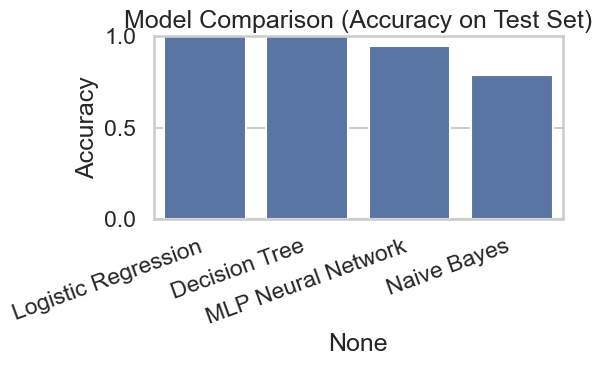

In [33]:
# Bar plot
plt.figure(figsize=(6,4))
sns.barplot(x=results_df.index, y="Accuracy", data=results_df)
plt.xticks(rotation=20, ha="right")
plt.ylim(0, 1)
plt.title("Model Comparison (Accuracy on Test Set)")
plt.tight_layout()
plt.show()


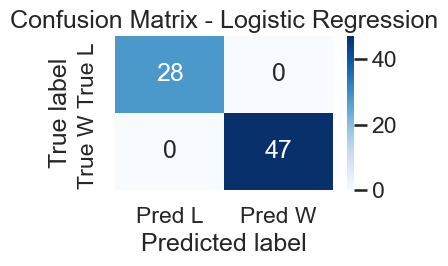

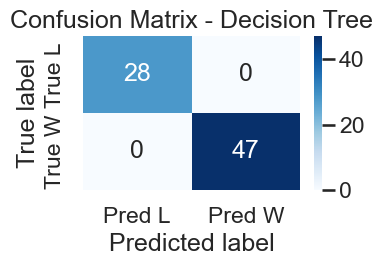

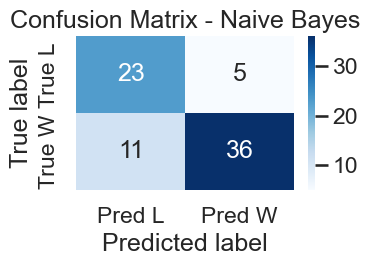

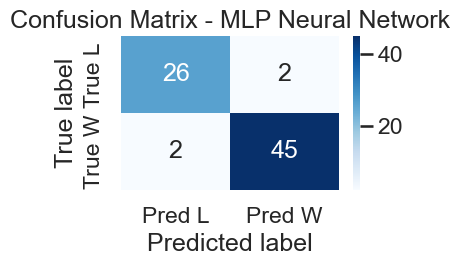

In [35]:
#Confusion Matrix'

for model_name, y_pred in y_pred_store.items():
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Pred L", "Pred W"],
                yticklabels=["True L", "True W"])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()
    plt.show()


## Limitations

This project has several limitations:

- Player-level data was not included.
- Injuries, rest days, and opponent strength were not explicitly modeled.
- The dataset size is limited when filtering to a single team.

As a result, predictions should be interpreted as **probabilistic tendencies**, not guarantees.

## Conclusion

This project demonstrates a complete machine learning workflow applied to a real-world sports analytics problem.

By comparing multiple models, cleaning real data, and using realistic evaluation methods, the project emphasizes understanding and reasoning over raw prediction accuracy.

Future work could include opponent modeling, player availability, and real-time feature updates.
